<a href="https://colab.research.google.com/github/jeonjnh/python_colab_exercise/blob/main/VaR_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install yfinance

In [5]:
import yfinance as yf, numpy as np, datetime as dt, matplotlib.pyplot as plt
from scipy.stats import norm

https://blog.quantinsti.com/calculating-covariance-matrix-portfolio-variance/

In [9]:
tickers = ['AAPL', 'C', 'DIS', 'F', 'MSFT', 'MS', 'GME', 'TSLA', 'AMZN']
weights = np.array([0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1])

In [10]:
start = dt.datetime(2023,1,1)
end = dt.datetime.now()

df = yf.download(tickers,start,end)['Adj Close']
df

[*********************100%%**********************]  9 of 9 completed


,AAPL,AMZN,C,DIS,F,GME,MS,MSFT,TSLA
Date,,,,,,,,,
2023-01-03,124.538658,85.820000,44.326996,88.970001,10.734951,17.200001,83.531410,237.956329,108.099998
2023-01-04,125.823189,85.139999,45.469543,91.980003,11.038250,17.320000,84.437660,227.547363,113.639999
2023-01-05,124.488876,83.120003,45.266209,91.919998,11.258832,16.219999,83.726295,220.803360,110.339996
2023-01-06,129.069336,86.080002,45.808437,93.919998,11.562130,16.459999,85.324432,223.405609,113.059998
2023-01-09,129.597076,87.360001,46.031136,94.769997,11.663230,16.379999,85.402382,225.580765,119.769997
...,...,...,...,...,...,...,...,...,...
2023-08-31,187.869995,138.009995,41.290001,83.680000,12.130000,18.549999,85.150002,327.760010,258.079987
2023-09-01,189.460007,138.119995,41.590000,81.639999,12.140000,18.420000,85.750000,328.660004,245.009995
2023-09-05,189.699997,137.270004,41.360001,81.190002,12.090000,19.230000,84.839996,333.549988,256.489990


In [11]:
returns = df.pct_change()
returns

,AAPL,AMZN,C,DIS,F,GME,MS,MSFT,TSLA
Date,,,,,,,,,
2023-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-04,0.010314,-0.007924,0.025775,0.033832,0.028253,0.006977,0.010849,-0.043743,0.051249
2023-01-05,-0.010605,-0.023726,-0.004472,-0.000652,0.019983,-0.063510,-0.008425,-0.029638,-0.029039
2023-01-06,0.036794,0.035611,0.011979,0.021758,0.026939,0.014797,0.019088,0.011785,0.024651
2023-01-09,0.004089,0.014870,0.004862,0.009050,0.008744,-0.004860,0.000914,0.009736,0.059349
...,...,...,...,...,...,...,...,...,...
2023-08-31,0.001172,0.021766,-0.001934,-0.007119,0.008313,0.009798,-0.001290,-0.003133,0.004593
2023-09-01,0.008463,0.000797,0.007266,-0.024379,0.000824,-0.007008,0.007046,0.002746,-0.050643
2023-09-05,0.001267,-0.006154,-0.005530,-0.005512,-0.004119,0.043974,-0.010612,0.014879,0.046855


In [12]:
cov_matrix = returns.cov()
cov_matrix

,AAPL,AMZN,C,DIS,F,GME,MS,MSFT,TSLA
AAPL,0.000183,0.000116,0.000055,0.000095,0.000096,0.000114,0.000072,0.000123,0.000223
AMZN,0.000116,0.000463,0.000080,0.000146,0.000146,0.000183,0.000083,0.000218,0.000284
C,0.000055,0.000080,0.000278,0.000131,0.000170,0.000153,0.000178,0.000027,0.000211
DIS,0.000095,0.000146,0.000131,0.000294,0.000164,0.000163,0.000124,0.000091,0.000240
F,0.000096,0.000146,0.000170,0.000164,0.000465,0.000248,0.000135,0.000087,0.000297
GME,0.000114,0.000183,0.000153,0.000163,0.000248,0.002373,0.000211,0.000119,0.000540
MS,0.000072,0.000083,0.000178,0.000124,0.000135,0.000211,0.000236,0.000079,0.000201
MSFT,0.000123,0.000218,0.000027,0.000091,0.000087,0.000119,0.000079,0.000290,0.000204
TSLA,0.000223,0.000284,0.000211,0.000240,0.000297,0.000540,0.000201,0.000204,0.001210


In [13]:
avg_returns = returns.mean()
avg_returns

AAPL    0.002179
AMZN    0.003021
C      -0.000359
DIS    -0.000436
F       0.000868
GME     0.001667
MS      0.000138
MSFT    0.002067
TSLA    0.005577
dtype: float64

In [15]:
count = returns.count()[0]
count

170

In [16]:
port_mean = avg_returns @ weights
port_std = np.sqrt(weights.T @ cov_matrix @ weights)

In [17]:
port_mean

0.0014722778502372904

In [18]:
port_std

0.013192242268963867

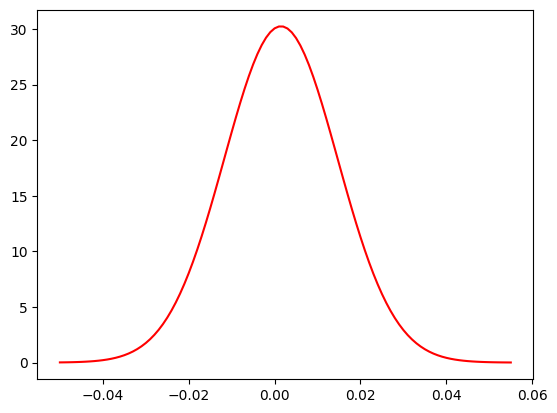

In [22]:
x = np.arange(-0.05,0.055,0.001)
norm_dist = norm.pdf(x, port_mean, port_std)

plt.plot(x, norm_dist, color='r')
plt.show()

In [23]:
confidence_level = 0.05

VaR = norm.ppf(confidence_level, port_mean, port_std)
VaR

-0.020227029693490453

In [24]:
num_days = 5

VaR * np.sqrt(num_days)

-0.04522901337755139

In [25]:
lower = port_mean - 2*port_std / np.sqrt(count)
higher = port_mean + 2*port_std / np.sqrt(count)

In [26]:
lower

-0.0005513197387002457

In [27]:
higher

0.0034958754391748266